# Using Naive Bayes algorithm for spam detection

In this assigment, you will predict if a sms message is 'spam' or 'ham' (i.e. not 'spam') using the Bernoulli Naive Bayes *classifier*.

The training data is from the UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection.  Please download the zip file before running the code below. 


## Step 1:  Getting, understanding, and cleaning the dataset


###  Importing the dataset

In [304]:
# Import the usual libraries
import numpy as np 
import pandas as pd  # To read in the dataset we will use the Panda's library
from google.colab import drive

df = pd.read_table('/content/sample_data/SMSSpamCollection', sep = '\t', header=None, names=['label', 'sms_message'])

# Next we observe the first 5 rows of the data to ensure everything was read correctly
df.head() 

,label,sms_message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Data preprocesssing
It would be more convenient if the labels were binary instead of 'ham' and 'spam'.  This way our code can always work with numerical values instead of strings.

In [305]:
df['label']=df.label.map({'spam':1, 'ham':0})
df.head() # Again, lets observe the first 5 rows to make sure everything worked before we continue

,label,sms_message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### Splitting the dcoument into training set and test set

In [306]:
# This time we will use sklearn's method for seperating the data
from sklearn.model_selection import train_test_split

df_train_msgs, df_test_msgs, df_ytrain, df_ytest = train_test_split(df['sms_message'],df['label'], random_state=0)

#Looking at the train/test split
print("The number of training examples: ", df_train_msgs.shape[0])
print("The number of test exampels: ", df_test_msgs.shape)

print("The first four labels")
print(df_ytrain[0:4])

print("The first four sms messages")
print(df_train_msgs[0:4])


The number of training examples:  4179
The number of test exampels:  (1393,)
The first four labels
872     0
831     1
1273    0
3314    0
Name: label, dtype: int64
The first four sms messages
872     Its going good...no problem..but still need li...
831     U have a secret admirer. REVEAL who thinks U R...
1273                                                Ok...
3314    Huh... Hyde park not in mel ah, opps, got conf...
Name: sms_message, dtype: object


###  Creating the feature vector from the text (feature extraction)

Each message will have its own feature vector.  For each message we will create its feature vector as we discussed in class; we will have a feature for every word in our vocabulary.  The $j$th feature is set to one ($x_j=1$) if the $j$th word from our vocabulary occurs in the message, and set the $j$ feature is set to $0$ otherwise ($x_j=0$).

We will use the sklearn method CountVectorize to create the feature vectors for every messge.

We could have written the code to do this directly by performing the following steps:
* remove capitalization
* remove punctuation 
* tokenize (i.e. split the document into individual words)
* count frequencies of each token 
* remove 'stop words' (these are words that will not help us predict since they occur in most documents, e.g. 'a', 'and', 'the', 'him', 'is' ...

In [307]:
# importing the library
from sklearn.feature_extraction.text import CountVectorizer
# creating an instance of CountVectorizer
# Note there are issues with the way CountVectorizer removes stop words.  To learn more: https://scikit-learn.org/stable/modules/feature_extraction.html#stop-words
vectorizer = CountVectorizer(binary = True, stop_words='english')

# If we wanted to perform Multnomial Naive Bayes, we would include the word counts and use the following code
#vectorizer = CountVectorizer(stop_words='english')

# To see the 'count_vector' object
print(vectorizer)

CountVectorizer(analyzer='word', binary=True, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)


In [308]:
# To see the 'stop words' 
print(vectorizer.get_stop_words())

frozenset({'enough', 'their', 're', 'off', 'other', 'herself', 'whence', 'mill', 'can', 'few', 'hers', 'keep', 'may', 'yourselves', 'show', 'anywhere', 'something', 'hasnt', 'upon', 'hence', 'six', 'such', 'top', 'already', 'us', 'well', 'but', 'wherever', 'around', 'down', 'alone', 'afterwards', 'in', 'full', 'these', 'two', 'mine', 'became', 'cant', 'moreover', 'third', 'be', 'a', 'how', 'sixty', 'fifteen', 'every', 'when', 'much', 'rather', 'were', 'still', 'whereafter', 'under', 'beyond', 'my', 'everywhere', 'beside', 'get', 'yours', 'becoming', 'they', 'beforehand', 'whom', 'up', 'themselves', 'next', 'serious', 'neither', 'nine', 'even', 'hereupon', 'eight', 'back', 'five', 'his', 'namely', 'within', 'too', 'least', 'those', 'throughout', 'toward', 'being', 'then', 'seeming', 'to', 'here', 'eleven', 'seem', 'first', 'amount', 'about', 'been', 'during', 'except', 'than', 'through', 'across', 'onto', 'while', 'whether', 'amoungst', 'herein', 'into', 'however', 'less', 'might', 'who

In [309]:
# Create the vocabulary for our feature transformation
vectorizer.fit(df_train_msgs)
feature=vectorizer.get_feature_names()
print(feature)


['00', '000', '000pes', '008704050406', '0089', '0121', '01223585334', '0125698789', '02', '0207', '02072069400', '02073162414', '021', '03', '04', '0430', '05', '050703', '0578', '06', '07', '07090201529', '07090298926', '07099833605', '0721072', '07734396839', '07742676969', '0776xxxxxxx', '07781482378', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07821230901', '078498', '07880867867', '0789xxxxxxx', '07946746291', '0796xxxxxx', '07xxxxxxxxx', '08', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18', '0870', '08700435505150p', '08700621170150p', '08701237397', '08701417012', '08701417012150p', '0870141701216', '087016248', '08701752560', '087018728737', '0870241182716', '08702490080', '0870

In [310]:
# Next we create the feature vectors for both the training data and the test data
X_train = vectorizer.transform(df_train_msgs).toarray() # code to turn the training emails into a feature vector
X_test = vectorizer.transform(df_test_msgs).toarray() # code to turn the test email into a feature vector

# Changing the target vectors data type  
y_train=df_ytrain.to_numpy() # Convereting from a Panda series to a numpy array
y_test = df_ytest.to_numpy()

# To observe what the data looks like 
print("The label of the first training example: ", y_train[0])
print("The first training example: ", X_train[0].tolist())# I needed to covernt the datatype to list so all the feature values would be printed

The label of the first training example:  0
The first training example:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# Your code goes here

In [311]:
# Check with the TA's on Piazza before you use the features of sklearn library in your code.
sum=y_train.shape[0]
print("sum of the train data",sum)

unique, frequency = np.unique(y_train, return_counts = True)  
# convert both into one numpy array 
count = np.asarray((unique, frequency )) 
print("The values and their frequency are:\n", count)
class0 = count[1,0]
class1 = count[1,1]
py0=class0/sum
py1=class1/sum

print("P(y=0)=",py0)
print("P(y=1)=",py1)

sum of the train data 4179
The values and their frequency are:
 [[   0    1]
 [3617  562]]
P(y=0)= 0.8655180665230916
P(y=1)= 0.13448193347690834


In [312]:
print(X_train.shape)
print(y_train.shape)

(4179, 7287)
(4179,)


In [313]:
#class 0
#class 1
c0=np.zeros((1,X_train.shape[1]),dtype=np.int16)
c1=np.zeros((1,X_train.shape[1]),dtype=np.int16)


In [314]:
for i in range(y_train.shape[0]):
  row=X_train[i]
  row.reshape(1,X_train.shape[1])
  if y_train[i]==0:
    c0=np.vstack((c0,row))
  else:
    c1=np.vstack((c1,row))

c0=np.delete(c0,0,0)
c1=np.delete(c1,0,0)
print(c0.shape)

(3617, 7287)


In [315]:
print(c1.shape)

(562, 7287)


In [316]:
numofclass0 = c0.sum(axis=0)
numofclass1 = c1.sum(axis=0)
numofall = X_train.sum(axis=0)

In [317]:
print(numofclass0.tolist())
print(numofclass1.tolist())
print(numofall.tolist())

[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 10, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 5, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,

In [318]:
def est_value(m):
  px0=(numofclass0+m)/(m*2+class0)
  px1=(numofclass1+m)/(m*2+class1)
  return px0,px1

In [319]:
pxclass0,pxclass1=est_value(0.1)
print("theta of class0",pxclass0)
print("theta of class1",pxclass1)

theta of class0 [2.76456928e-05 2.76456928e-05 3.04102621e-04 ... 3.04102621e-04
 2.76456928e-05 3.04102621e-04]
theta of class1 [0.01262896 0.0357524  0.00017787 ... 0.00017787 0.0019566  0.00017787]


In [320]:
index_admirer=feature.index('admirer')
index_secret=feature.index('secret')
print("Theta admirer given y=0:",pxclass0[index_admirer])
print("Theta admirer given y=1:",pxclass1[index_admirer])
print("Theta secret given y=0:",pxclass0[index_secret])
print("Theta secret given y=1:",pxclass1[index_secret])


Theta admirer given y=0: 2.7645692801061596e-05
Theta admirer given y=1: 0.014407684098185698
Theta secret given y=0: 0.0005805595488222935
Theta secret given y=1: 0.014407684098185698


In [321]:
def predict(xtest,xtrain,pxclass0,pxclass1):
  label0=np.array([0])
  label1=np.array([1])
  predy=np.zeros((1,1),dtype=np.int16)
  predy=predy.reshape(1,1)
  for i in range(xtest.shape[0]):
    temp0=0
    temp1=0
    row=xtest[i]
    row=row.reshape(1,xtrain.shape[1])
    for j in range(xtest.shape[1]):
      if row[0][j]!=0:
        temp0=temp0+np.log(row[0][j]*pxclass0[j])
        temp1=temp1+np.log(row[0][j]*pxclass1[j])

    t0=temp0+np.log(py0)
    t1=temp1+np.log(py1)
    if t0>=t1:
      predy=np.vstack((predy,label0)) 
    else: 
      predy=np.vstack((predy,label1))

  predy=np.delete(predy,0,0)
  predy=predy.reshape(predy.shape[0],)
  return predy

In [322]:
result=predict(X_test,X_train,pxclass0,pxclass1)

In [323]:
print(result.tolist())
print(result.shape)

[0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 

In [324]:
print("first 5 values:",result[0:5,])
print("last 5 values:",result[result.shape[0]-5:result.shape[0],])

first 5 values: [0 1 0 0 0]
last 5 values: [0 1 1 0 0]


In [325]:
print(y_test.tolist())
print(y_test.shape)

[0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 

In [326]:
def percentage_error(res,ytest):
  correct=0
  incorrect=0
  for i in range(ytest.shape[0]):
    if res[i]!=ytest[i]:
      incorrect=incorrect+1
    else:
      correct=correct+1
  print("number of test example classfied incorrectly:",incorrect)
  print("number of test example classfied correctly:",correct)
  per_error=incorrect/(incorrect+correct)
  return per_error


In [327]:
percentage_error(result,y_test)

number of test example classfied incorrectly: 53
number of test example classfied correctly: 1340


0.03804737975592247

In [328]:
eArray=np.zeros((1,),dtype=np.int16)
for i in np.arange(0.0, 1.0, 0.05):
  px0,px1=est_value(i)
  res=predict(X_test,X_train,px0,px1)
  per=percentage_error(res,y_test)
  eArray=np.hstack((eArray,per)) 
eArray=np.delete(eArray,0)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


number of test example classfied incorrectly: 69
number of test example classfied correctly: 1324
number of test example classfied incorrectly: 47
number of test example classfied correctly: 1346
number of test example classfied incorrectly: 53
number of test example classfied correctly: 1340
number of test example classfied incorrectly: 58
number of test example classfied correctly: 1335
number of test example classfied incorrectly: 68
number of test example classfied correctly: 1325
number of test example classfied incorrectly: 75
number of test example classfied correctly: 1318
number of test example classfied incorrectly: 88
number of test example classfied correctly: 1305
number of test example classfied incorrectly: 94
number of test example classfied correctly: 1299
number of test example classfied incorrectly: 97
number of test example classfied correctly: 1296
number of test example classfied incorrectly: 108
number of test example classfied correctly: 1285
number of test exam

In [329]:
print(eArray)

[0.04953338 0.03374013 0.03804738 0.04163676 0.04881551 0.05384063
 0.06317301 0.06748026 0.06963388 0.07753051 0.08399139 0.08901651
 0.09117014 0.09547739 0.10480976 0.11629576 0.12347452 0.12849964
 0.13352477 0.14070352]


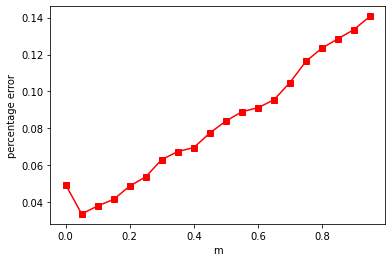

In [330]:
import matplotlib.pyplot as plt

x = np.arange(0.0, 1.0, 0.05)
plt.plot(x,eArray,'s-',color = 'r',label="ATT-RLSTM")
plt.xlabel("m")
plt.ylabel("percentage error")
plt.show()

In [331]:
import collections
print(collections.Counter(y_test))
print("Zero-R accuracy=",1208/1393)

Counter({0: 1208, 1: 185})
Zero-R accuracy= 0.8671931083991385
